# Perceptron implementation from scratch in Python

Please note that contents in this notebook do not emphasize on concepts of the algorithm, but more on the implementation of the algorithm itself in the programming language.

## Basics 

Some notes about Perceptron algorithm:
- It's a supervised learning algorithm for binary classification
- 'Binary' means that the label will only have 2 values: 'yes' or 'no', '-1' or '1', ...
- A simple algorithm that only works with **linearly separable** dataset. This means that given a dataset, there will always exist a line, a plane or hyperplane that can successfully separate the input data into 2 groups.
- This is the building block for Neural Networks and Deep Learning

In the most basic terms, Perceptron is a function that maps input `x` (a vector or matrix of values) to an ouput `f(x)` (a single binary value):

![](./img/perceptron.png)

## Mathematically

In math form, the Perceptron algorithm looks like this:

$$f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b \ge 0\\-1 & \text{otherwise}\end{cases}$$

The output (here is either -1 or +1) can be deduced from something called an **activation function**

The **activation function** can be represented in Python easily as following:

In [2]:
def activation_func(some_number):
    if some_number >= 0:
        return 1
    else:
        return -1

Here, `some_number` is in fact the weighted sum of the input data and the weights. Fortunately, in Python, specifically `numpy`, we have a built-in function that does exactly the above, called `numpy.sign()`. In this implementation, we will use this function instead of building our own.

## The algorithm

The Perceptron algorithms can be expressed as following:
1. For every input, multiply the input with its weight. In the first iteration, `weights` can be initialized to some random value(s)
2. Sum all of the weighted inputs
3. Compute the output of the perceptron based on the sum in step 2 that passed to the activation function. In other words, **the output of the perceptron is the sign of the weighted sum.**
4. Compare and compute the error from what returned from **step 3** with the ground truth (true label). If the Perceptron returns incorrect result, adjust the weights accordingly.
5. Repeat step 1 - 4 until the converge

As mentioned above, what returned by the Perceptron is a binary output, in this case we will use `1` and `-1`. 



In [3]:
def guess(data_point):
    weighted_sum = np.sum(data_point * weights)
    
    # Using np.sign() to get the output for the weighted sum
    # If weighted_sum >= 0, return 1, otherwise -1
    return np.sign(weighted_sum)

From the guessed output, error can be computed by following intuitive formula:

$$error = prediction - target$$

If the Perceptron returns correct result, the `error` will be 0, and non-zero otherwise. It can be represented in below table:

| target | prediction | error |
|--------|------------|-------|
| +1     | +1         | 0     |
| +1     | -1         | 2     |
| -1     | +1         | -2    |
| -1     | -1         | 0     |

Based on the error, we will have to adjust the weights:

$$new Weight = old Weight + error * input$$

Another thing that worth mentioning is the **learning rate**. The procedure in which we gradually adjust the weights is called **gradient descent**, where we try to find the weights that minimize error. The value of learning rate is important because if it's too small, the algorithm will take too long to converge. In contrast, if it's too big, we might miss the optimal value.

We can include the learning rate into our calculation of `newWeight`:
$$newWeight = oldWeight + error * input * learningRate$$

This is done iteratively for every input until the algorithm converges, meaning all `predictions` are same as `targets`. Here's our training function:

In [4]:
def fit(data_point, label): 
    prediction = guess(data_point)
    error = label - prediction
    
    # lr = learning rate
    weights += error * data_point * lr 

After *fitting* all training data, what we get is the final set of weights that can be applied to new data to predict their labels.

That's it, it's really simple because Perceptron is a very simple algorithm.

## Testing

In order to test our algorithm, we will classify a list of points in a 2D graph. 
1. Generate a list of points with random coordinate `(x, y)` used as our training data
2. Each point will have a label following these rules:
   - if `x >= y`, `label = 1`
   - otherwise, `label = -1`
3. Generate another list of random points to be used as test data
4. Pass all points from the training data to the Perceptron
5. Use the generated `weights` to predict the label of the points in test data

The expected output should be that all points from test data must have `label = 1` if `x >= y` and `label = -1` otherwise.

In [6]:
# our Point class
class Point(object):
    def __init__(self, x, y, label=1):
        
        self.x = x
        self.y = y
        
        if x >= y:
            label = 1
        else:
            label = -1
        self.label = label

Generate training and test data:

In [7]:
# Generate random training data from Point class and plot
number_of_training_points = 100
number_of_testing_points = 40

train_data = []
for i in range(number_of_training_points):
    point = Point(  np.random.randint(0, 100),
                    np.random.randint(0, 100) )

    train_data.append([point.x, point.y, point.label])
        
train = pd.DataFrame(data=train_data, columns=['x', 'y', 'label'])

# Similarly, generate random test data without labels
test_data = []
for i in range(number_of_testing_points):
    point = Point(  np.random.randint(0, 100),
                    np.random.randint(0, 100))

    test_data.append([point.x, point.y])
        
test = pd.DataFrame(data=test_data, columns=['x', 'y'])

What do they look like?

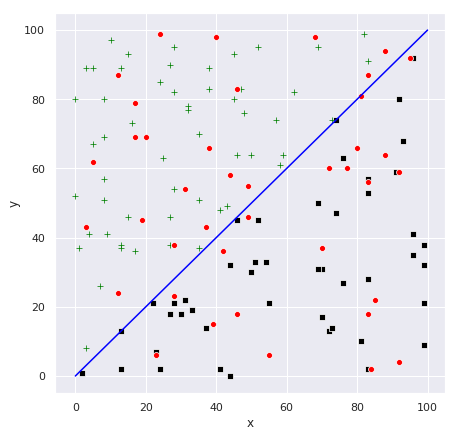

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(train[train.label==1].x, train[train.label==1].y, color='black', marker='s')
sns.scatterplot(train[train.label==-1].x, train[train.label==-1].y, color='green', marker='+')
sns.scatterplot(test.x, test.y, color='red')
sns.lineplot([0, 100], [0, 100], color='blue')

Here are observations from above plot:
- Points represented by **black squares** have `label = 1`
- Points represented by **green crosses (+)** have `label = -1`
- Points represented by **red circles** are our test data

After training data and predict the label for test set, we expect that all red circles will be classified into either black squares or green crosses.

Now we will train the training data:

In [9]:
X = train[['x', 'y']]
y = train.label

brain = Perceptron()

# Initialize random weights
brain.init_weights(X.values)

# Feed each and every point from the training data to the Perceptron
for i in range(X.shape[0]):
    brain.fit(X.iloc[i], y[i])
    
# What are our weights?
print("Weights: {}".format(list(brain.weights)))

Weights: [20.066883520866234, -19.733116479133766]


Predicting labels for the test set:

In [10]:
predictions = brain.predict(test)
predictions

array([-1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        1.,  1., -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,
       -1.])

## How accurate is our prediction?

To check the accuracy of our model, we will plot the test points again. But this time:
- if the test point has `label = 1`, we will plot it as red square
- if the test point has `label = -1`, we will plot it as red cross

We will use same shapes for each label with the training data, but differentitate by the red color

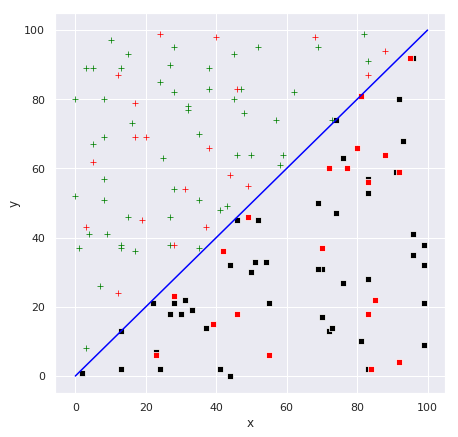

In [11]:
# Plot the training data and the regression line
fig, ax = plt.subplots(1, 1, figsize=(7,7))
sns.scatterplot(train[train.label==1].x, train[train.label==1].y, color='black', marker='s')
sns.scatterplot(train[train.label==-1].x, train[train.label==-1].y, color='green', marker='+')
sns.lineplot([0, 100], [0, 100], color='blue')

# Add the predictions to the test set
test['pred'] = predictions

# Plot the test data
sns.scatterplot(test[test.pred==1].x, test[test.pred==1].y, color='red', marker='s')
sns.scatterplot(test[test.pred==-1].x, test[test.pred==-1].y, color='red', marker='+')

From the graph, we can see that all the points in test set (in red squares and crosses) are classified correctly.

## What's next?
- Perceptron is the basic building block for Neural Networks and Deep Learning, we can start look into these algorithm to train better model

## Resources
- [Neural Networks - Intelligence and Learning - The Coding Traing](https://www.youtube.com/playlist?list=PLRqwX-V7Uu6Y7MdSCaIfsxc561QI0U0Tb)
- [Perceptron Learning Algorithm - Machine Learning cơ bản](https://machinelearningcoban.com/2017/01/21/perceptron/)